# Imports

In [ ]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 36.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install utils


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import numpy as np
import re
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import utils
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.svm import SVC



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Exploring Datasets

In [ ]:
df1= pd.read_csv('MHD Train data.csv')

In [ ]:
df2=pd.read_csv('MHD Test data.csv')

In [ ]:
df1.head()

,ID,Tweet,Topic,Manual \nSentiment,Automatic Sentiment \nArabert LArge,Sentiment\n Probability
0,1,ابحث عن اسباب الارق وعالجها,الارق,1,1,0.757036
1,2,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,الاكتئاب,1,1,0.577320
2,3,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,الاكتئاب,1,1,0.995972
3,4,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,ثنائي القطب,0,0,0.998994
4,5,اتشافي من ثنائي القطب,ثنائي القطب,1,1,0.970769


In [ ]:
df2.head()

,ID,Tweet,Topic,Manual \nSentiment,Automatic Sentiment \nArabert LArge,Sentiment\n Probability
0,1,اتابع سخط قلق شكوي كثيرين علي وسائل التفاعل ا...,القلق,0,0,0.988868
1,2,اترك عنك المثاليه علاج الاكتئاب بذكر الله سبح...,الاكتئاب,1,1,0.971001
2,3,اتفه انواع البشر لي يقعد ما يعرفكش الا وقت ال...,الضغط النفسي,0,0,0.993384
3,4,اتمني العمر ميخلصش قبل ما تلاقي الشخص اللي تق...,الارق,1,1,0.927087
4,5,اتمني ان تجمعني الحياه بكل ما هو حنون ان يقع...,القلق,1,1,0.995857


In [ ]:
df3 = pd.concat([df1, df2], ignore_index=True)

# Display the merged DataFrame
df3.head()

,ID,Tweet,Topic,Manual \nSentiment,Automatic Sentiment \nArabert LArge,Sentiment\n Probability
0,1,ابحث عن اسباب الارق وعالجها,الارق,1,1,0.757036
1,2,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,الاكتئاب,1,1,0.577320
2,3,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,الاكتئاب,1,1,0.995972
3,4,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,ثنائي القطب,0,0,0.998994
4,5,اتشافي من ثنائي القطب,ثنائي القطب,1,1,0.970769


In [ ]:
df4=pd.read_csv('final_dataset.csv')

In [ ]:
df3.shape

(3500, 6)

In [ ]:
df3.isnull().sum()

ID                                      0
Tweet                                   0
Topic                                   1
Manual \nSentiment                      0
Automatic Sentiment \nArabert LArge     0
 Sentiment\n Probability                0
dtype: int64

In [ ]:
df3.duplicated().sum()

0

In [ ]:
df3['Topic'].unique()

array(['الارق ', 'الاكتئاب ', 'الاكتئاب', 'ثنائي القطب', 'القلق', 'الارق',
       'الضغط النفسي', nan], dtype=object)

In [ ]:
df4.head()

,tweet,category
0,سلاما لمن يجلس وحيدا مشتت لافكاار مبعثر لمشاا...,Diminished ability to think or concentrate
1,مشتت,Diminished ability to think or concentrate
2,واني اعلم ان الطريق طويل وانا لوحدي والخوف يت...,Diminished ability to think or concentrate
3,مو قادره اركز كثر التشتت,Diminished ability to think or concentrate
4,طبعا لان جماعه ابن مشتت الفكر,Diminished ability to think or concentrate


In [ ]:
df4.isnull().sum()

tweet       7
category    7
dtype: int64

In [ ]:
df4.duplicated().sum()

133

In [ ]:
df4['category'].unique()

array(['Diminished ability to think or concentrate',
       'feelings of worthlessness', 'Feelings of worthlessness', nan,
       'losing interest or pleasure in activities', 'loss of energy',
       'low mood', 'Psychomotor agitation or retardation',
       'sleep disorder', 'Suicidality', 'weight disorder'], dtype=object)

# Transforming Data

In [ ]:
# Clean the 'Topic' column by stripping spaces and converting to lowercase
df3['Topic'] = df3['Topic'].str.strip().str.lower()

# Remove duplicate rows after cleaning
df3 = df3.drop_duplicates()

# Display unique values after cleaning
print(df3['Topic'].unique())

['الارق' 'الاكتئاب' 'ثنائي القطب' 'القلق' 'الضغط النفسي' nan]


In [ ]:
df3=df3.dropna()

In [ ]:
df3.isnull().sum()

ID                                      0
Tweet                                   0
Topic                                   0
Manual \nSentiment                      0
Automatic Sentiment \nArabert LArge     0
 Sentiment\n Probability                0
dtype: int64

In [ ]:
df3.head()

,ID,Tweet,Topic,Manual \nSentiment,Automatic Sentiment \nArabert LArge,Sentiment\n Probability
0,1,ابحث عن اسباب الارق وعالجها,الارق,1,1,0.757036
1,2,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,الاكتئاب,1,1,0.577320
2,3,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,الاكتئاب,1,1,0.995972
3,4,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,ثنائي القطب,0,0,0.998994
4,5,اتشافي من ثنائي القطب,ثنائي القطب,1,1,0.970769


In [ ]:
# Mapping 'القلق' to 'الضغط النفسي'
replacement_dict = {'القلق': 'الضغط النفسي'}

# Replace 'القلق' with 'الضغط النفسي'
df3['Topic'] = df3['Topic'].replace(replacement_dict)

In [ ]:
# Mapping dictionary for replacements
replacement_dict = {
    'الارق': 'Insomnia',
    'ثنائي القطب': 'Bipolar',
    'الاكتئاب': 'Depression',
    'الضغط النفسي': 'Stress'
}

# Replace values in the 'Topic' column using the mapping dictionary
df3['Topic'] = df3['Topic'].replace(replacement_dict)

# Replace 'worry' with 'stress'
df3['Topic'] = df3['Topic'].replace('worry', 'stress')

# Remove duplicate rows after cleaning
df3 = df3.drop_duplicates()

# Display unique values after cleaning and replacement
df3['Topic'].unique()

array(['Insomnia', 'Depression', 'Bipolar', 'Stress'], dtype=object)

In [ ]:
df3.columns

Index(['ID', 'Tweet', 'Topic', 'Manual \nSentiment',
       'Automatic Sentiment \nArabert LArge ', ' Sentiment\n Probability'],
      dtype='object')

In [ ]:
# Selecting specific columns and renaming them
df3 = df3[['Tweet', 'Topic']]
df3.rename(columns={'Tweet': 'tweet', 'Topic': 'category'}, inplace=True)

In [ ]:
df3.head()

,tweet,category
0,ابحث عن اسباب الارق وعالجها,Insomnia
1,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,Depression
2,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,Depression
3,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,Bipolar
4,اتشافي من ثنائي القطب,Bipolar


In [ ]:
# Cleaning the 'category' column by stripping spaces and converting to lowercase
df4['category'] = df4['category'].str.strip().str.lower()

# Replace similar values to a single consistent value
df4['category'] = df4['category'].replace('feelings of worthlessness', 'feelings of worthlessness', regex=True)

# Remove duplicate rows after cleaning
df4 = df4.drop_duplicates()

# Display unique values after cleaning and replacement
print(df4['category'].unique())

['diminished ability to think or concentrate' 'feelings of worthlessness'
 nan 'losing interest or pleasure in activities' 'loss of energy'
 'low mood' 'psychomotor agitation or retardation' 'sleep disorder'
 'suicidality' 'weight disorder']


In [ ]:
# Cleaning the 'Symptoms' column by stripping spaces and converting to lowercase
df4['category'] = df4['category'].str.strip().str.lower()

# Mapping dictionary for symptoms to mental disorders
mapping_dict = {
    'diminished ability to think or concentrate': 'Bipolar',
    'feelings of worthlessness': 'Depression',
    'losing interest or pleasure in activities': 'Depression',
    'low mood': 'Depression',
    'psychomotor agitation or retardation': 'Bipolar',
    'sleep disorder': 'Insomnia',
    'suicidality': 'Depression',
    'loss of energy': 'Stress',
    'weight disorder': 'Depression'
}


# Function to assign category based on symptoms
def assign_category(symptom):
    return mapping_dict.get(symptom)

# Assigning categories based on symptoms
df4['category'] = df4['category'].apply(assign_category)

# Display updated df4 with mapped categories
df4.head()

,tweet,category
0,سلاما لمن يجلس وحيدا مشتت لافكاار مبعثر لمشاا...,Bipolar
1,مشتت,Bipolar
2,واني اعلم ان الطريق طويل وانا لوحدي والخوف يت...,Bipolar
3,مو قادره اركز كثر التشتت,Bipolar
4,طبعا لان جماعه ابن مشتت الفكر,Bipolar


In [ ]:
df4 = df4.sample(frac=1).reset_index(drop=True)
df4.head(20)

,tweet,category
0,احس بخمول وكسل فضيع ان قمت المغرب,Bipolar
1,خاب ظني وفاق القلب حر ذاق,Depression
2,مالي نفس اكل امس انسدت نفسي الضغط الي فوق راسي,Depression
3,نفسي اموت واخلص صداعهم مش مبسوط اللي بيجرا منهم,Depression
4,جالسه احلم فعلا اسمه شتات ومخي مشتت,Bipolar
5,احس من التوتر مو قادره انام,Insomnia
6,احس بضيق,Depression
7,يوم ونص صاحيه فيني ارق,Insomnia
8,مشتت ذهنيا مرهق جسديا,Bipolar
9,و مشتته,Bipolar


In [ ]:
df4['category'].unique()

array(['Bipolar', 'Depression', 'Insomnia', 'Stress', None], dtype=object)

In [ ]:
df4.isnull().sum()

tweet       1
category    1
dtype: int64

In [ ]:
df4.dropna(inplace=True)

In [ ]:
df4.isna().sum()

tweet       0
category    0
dtype: int64

In [ ]:
df4.duplicated().sum()

0

In [ ]:
# Concatenating df3 and df4 vertically
df5 = pd.concat([df3, df4], ignore_index=True)

# Display the merged DataFrame
df5.head(20)

,tweet,category
0,ابحث عن اسباب الارق وعالجها,Insomnia
1,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,Depression
2,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,Depression
3,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,Bipolar
4,اتشافي من ثنائي القطب,Bipolar
5,اتعافي من الاكتئاب ما يرجع لي مره ثالثه,Depression
6,اتوقع فيه نقص في فتمين دال او الغده الدرقيه و...,Insomnia
7,اتوقع لولا الله ثم الرياضه كان اكلني الاكتئاب...,Depression
8,اتوقع هو انهي حياته بسبب مرض ثنائي القطب كان ...,Bipolar
9,اتي كالفكره الامنه في راس قلق,Stress


In [ ]:
df5.shape

(4594, 2)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     4594 non-null   object
 1   category  4594 non-null   object
dtypes: object(2)
memory usage: 71.9+ KB


In [ ]:
df5.describe()

,tweet,category
count,4594,4594
unique,4594,4
top,رسميا بدا موسم الاكتئاب والاكل الغير صحي والاس...,Depression
freq,1,1592


In [ ]:
df5.isna().sum()

tweet       0
category    0
dtype: int64

In [ ]:
df5.duplicated().sum()

0

## Visualizations

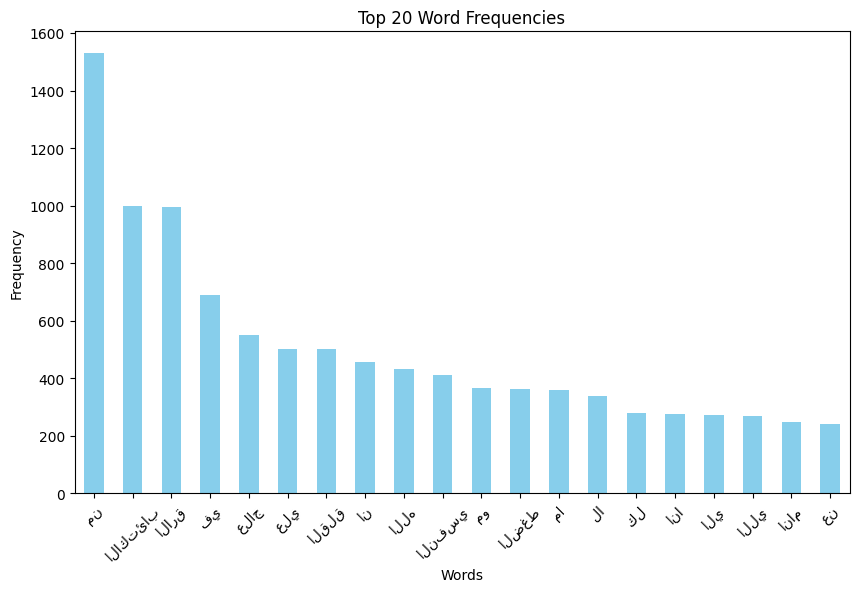

In [ ]:
# Calculate word frequencies
word_freq = df5['tweet'].str.split(expand=True).stack().value_counts()

# Plot word frequencies
plt.figure(figsize=(10, 6))
word_freq.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

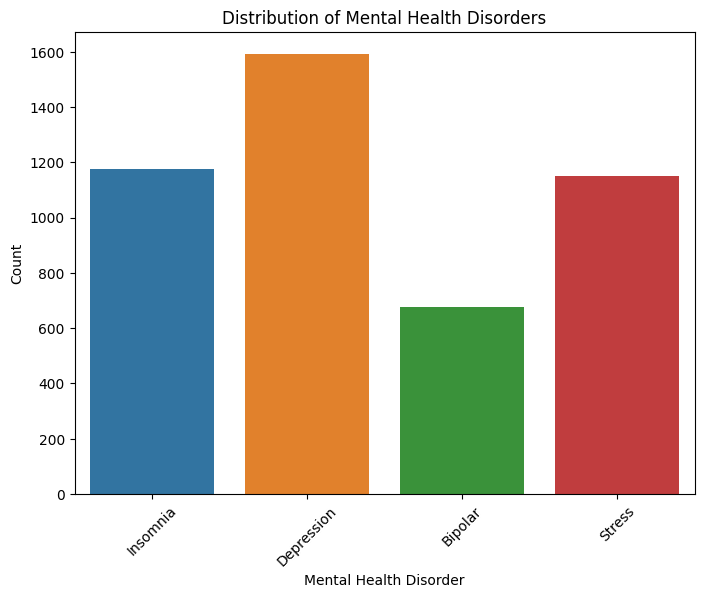

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df5)
plt.title('Distribution of Mental Health Disorders')
plt.xlabel('Mental Health Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

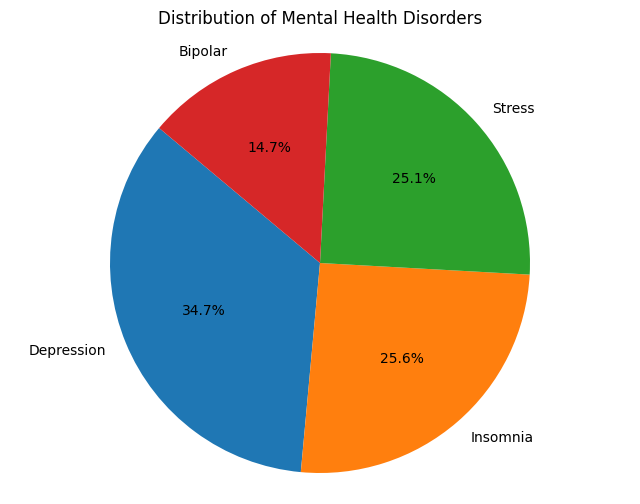

In [ ]:
category_counts = df5['category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mental Health Disorders')
plt.axis('equal')
plt.show()

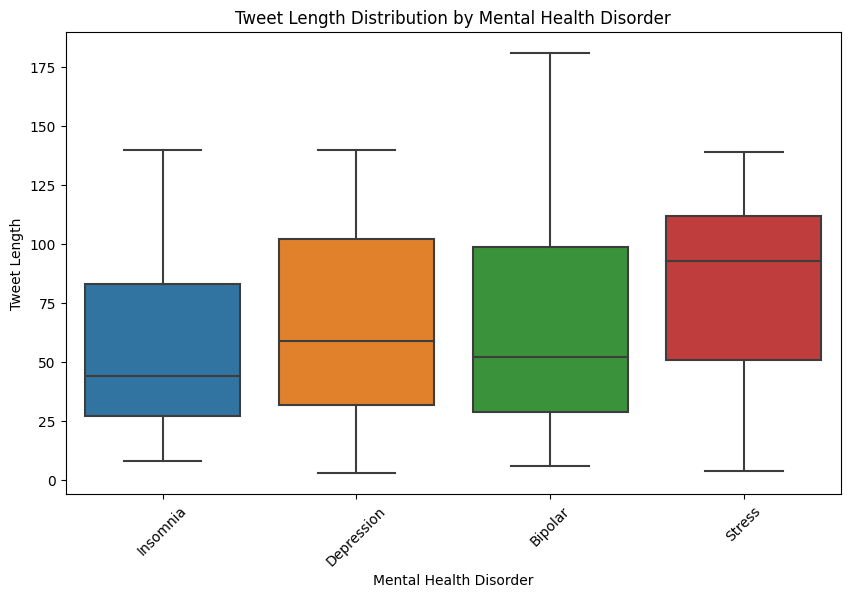

In [ ]:
df5['tweet_length'] = df5['tweet'].apply(len)
# Boxplot of tweet length by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='tweet_length', data=df5)
plt.title('Tweet Length Distribution by Mental Health Disorder')
plt.xlabel('Mental Health Disorder')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df5.drop('tweet_length',axis=1,inplace=True)

## Checking If data is balanced

In [ ]:
# Assuming 'target_column' is your target column in the DataFrame
class_distribution = df5['category'].value_counts()
print(class_distribution)

Depression    1592
Insomnia      1175
Stress        1151
Bipolar        676
Name: category, dtype: int64


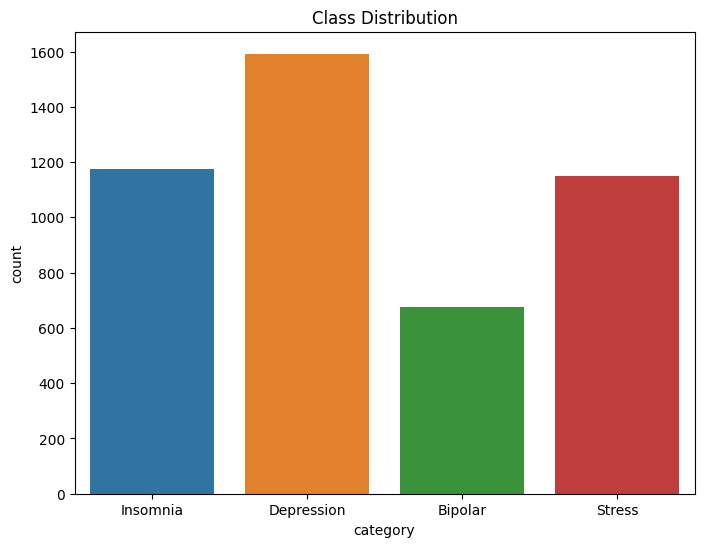

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df5)
plt.title('Class Distribution')
plt.show()


In [ ]:
class_ratios = df5['category'].value_counts(normalize=True)
print(class_ratios)

Depression    0.346539
Insomnia      0.255768
Stress        0.250544
Bipolar       0.147148
Name: category, dtype: float64


# Preprocessing

## Tokenization

In [ ]:
# Tokenize each tweet in the 'tweet' column
df5['tweet'] = df5['tweet'].apply(lambda x: word_tokenize(x))
df5.head()

,tweet,category
0,"[ابحث, عن, اسباب, الارق, وعالجها]",Insomnia
1,"[ابحثي, عن, اكتئاب, ما, بعد, الولاده, والله, ي...",Depression
2,"[ابداع, الطالبات, في, تقديم, محتوي, مميز, وتحا...",Depression
3,"[ابناء, المتمر, مجرد, حمقي, يعانون, من, اضطراب...",Bipolar
4,"[اتشافي, من, ثنائي, القطب]",Bipolar


## Removing Stop words

In [ ]:
arabic_stop_words = set(stopwords.words('arabic')) 
# arabic_stopwords = [
#     'ذانك', 'أمس', 'مهما', 'أنى', 'لولا', 'أنبأ', 'خمسمئة', 'مليم', 'تفعلان', 'لي', 'طاق', 'عما', 'لوما', 'أحد', 'تاء',
#     'هَذِه', 'شرع', 'ذانِ', 'إيهٍ', 'زعم', 'لست', 'علق', 'أصبح', 'حتى', 'ثمانمئة', 'أضحى', 'ساء', 'وإذ', 'فضلا', 'استحال',
#     'أوت', 'نيف', 'شين', 'لسنا', 'دواليك', 'بي', 'آه', 'تلقاء', 'خال', 'إليكنّ', 'ولا', 'والذين', 'طَق', 'شيكل', 'يوان',
#     'تشرين', 'وا', 'اثني', 'كان', 'ليسوا', 'بكن', 'فإن', 'ثمّ', 'له', 'كلاهما', 'ياء', 'انبرى', 'كثيرا', 'أُفٍّ', 'سبع',
#     'كاد', 'عدَّ', 'ثمَّ', 'إذاً', 'أنتِ', 'تين', 'حار', 'لستم', 'ذِه', 'أعلم', 'هَذا', 'عاد', 'حمدا', 'في', 'آهٍ',
#     'يونيو', 'حرى', 'ثمان', 'هن', 'ته', 'ط', 'بهما', 'آب', 'عاشر', 'عيانا', 'ثمة', 'جيم', 'إحدى', 'منها', 'أجل',
#     'أيّان', 'بيد', 'صهْ', 'الآن', 'هاهنا', 'يمين', 'تعلَّم', 'لهن', 'لكن', 'أسكن', 'فوق', 'خمسمائة', 'لستما', 'تسعة',
#     'علًّ', 'ديسمبر', 'تحوّل', 'تعسا', 'ذه', 'ممن', 'به', 'هبّ', 'لا سيما', 'حيثما', 'لعلَّ', 'ثلاثمائة', 'بك',
#     'نعم',  'الألى', 'تسعمئة', 'كذا', 'مايو', 'أفريل', 'قام', 'أن', 'بمن', 'هذان', 'تاسع', 'قاف', 'كليهما', 'ا',
#     'منه', 'يوليو', 'ثلاث', 'باء', 'ص', 'كما', 'بس', 'كأنما', 'جنيه', 'آمينَ', 'ستمئة', 'مه', 'هللة', 'أخذ', 
#     'ماي', 'ولكن', 'ثلاثين', 'مكانكم', 'هو', 'اللذان', 'همزة', 'إما', 'ذِي', 'الذي', 'عليه', 'بات', 'شتان', 'حادي', 'أقل',
#     'أمسى', 'خلف', 'ذات', 'بعض', 'أولئك', 'بَسْ', 'يفعلان', 'كليكما', 'إياهن', 'لكي', 'إذما', 'وهب', 'مكانكنّ',
#     'آض', 'فإذا', 'هيهات', 'بعد', 'يفعلون', 'ذلك', 'أنشأ', 'تلك', 'زاي', 'ذو', 'ولو', 'ومن', 'أيار', 'غين', 'بهم',
#     'قطّ', 'ليسا', 'درى', 'سحقا', 'لعل', 'اربعون', 'هاتان', 'أنا', 'الألاء', 'مارس', 'على', 'طالما', 'أيها', 'ثمّة',
#     'سنتيم', 'ما انفك', 'ذينك', 'لنا', 'أطعم', 'مادام', 'جوان', 'بنا', 'تجاه', 'بسّ', 'ستمائة', 'هَيْهات', 'آناء', 'أربع',
#     'هل', 'لا', 'تانِ', 'كن', 'آذار', 'خاء', 'كيف', 'مذ', 'فيفري', 'سبعة', 'إنَّ', 'حاء', 'هذين', 'اثنين', 'هلا',
#     'ارتدّ', 'أكثر', 'ذلكن', 'منذ', 'ريال', 'قد', 'ذاك', 'ضاد', 'كسا', 'حيث', 'كذلك', 'وُشْكَانَ', 'بخٍ', 'تحت', 'وَيْ',
#     'معاذ', 'لهما', 'لها', 'إنه', 'أمامكَ', 'كلّما', 'عشر', 'نحو', 'أفٍّ', 'كأين', 'أين', 'إياي', 'فرادى', 'هاك',
#     'فيها', 'كي','و','لمن','ان','لان','ان','لا']
# arabic_stop_words.update(arabic_stopwords)


# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    return [w for w in tokens if w.lower() not in arabic_stop_words]

# Remove stopwords from 'tweet' column using apply()
df5['tweet'] = df5['tweet'].apply(remove_stopwords)
df5.head()

,tweet,category
0,"[ابحث, اسباب, الارق, وعالجها]",Insomnia
1,"[ابحثي, اكتئاب, الولاده, والله, يفرجها]",Depression
2,"[ابداع, الطالبات, تقديم, محتوي, مميز, وتحارب, ...",Depression
3,"[ابناء, المتمر, مجرد, حمقي, يعانون, اضطرابات, ...",Bipolar
4,"[اتشافي, ثنائي, القطب]",Bipolar


## Removing Numbers and Punctuation

In [ ]:

def contains_numbers(token):
    return any(char.isdigit() for char in token)

def contains_punctuation(token):
    return any(char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' for char in token)

# Check each token list in the 'tweet' column
for tweet_tokens in df5['tweet']:
    for token in tweet_tokens:
        if contains_numbers(token):
            print(f"Token '{token}' contains numbers.")
        if contains_punctuation(token):
            print(f"Token '{token}' contains punctuation.")


Token '٧' contains numbers.
Token '١٠' contains numbers.
Token '3' contains numbers.
Token '35' contains numbers.
Token '10' contains numbers.
Token '٤' contains numbers.


In [ ]:
 
def remove_numbers_from_token(token):
    return ''.join([char for char in token if not char.isdigit()])


def remove_numbers_from_list(tokens_list):
    return [remove_numbers_from_token(token) for token in tokens_list]


df5['tweet'] = df5['tweet'].apply(remove_numbers_from_list)
df5.head(10)

,tweet,category
0,"[ابحث, اسباب, الارق, وعالجها]",Insomnia
1,"[ابحثي, اكتئاب, الولاده, والله, يفرجها]",Depression
2,"[ابداع, الطالبات, تقديم, محتوي, مميز, وتحارب, ...",Depression
3,"[ابناء, المتمر, مجرد, حمقي, يعانون, اضطرابات, ...",Bipolar
4,"[اتشافي, ثنائي, القطب]",Bipolar
5,"[اتعافي, الاكتئاب, يرجع, مره, ثالثه]",Depression
6,"[اتوقع, نقص, فتمين, او, الغده, الدرقيه, والضغط...",Insomnia
7,"[اتوقع, الله, الرياضه, اكلني, الاكتئاب, والتعب...",Depression
8,"[اتوقع, انهي, حياته, بسبب, مرض, ثنائي, القطب, ...",Bipolar
9,"[اتي, كالفكره, الامنه, راس, قلق]",Stress


## Stemming

In [ ]:

def stem_tokens(tokens):
    stemmer = ISRIStemmer()
    string_tokens = [str(t) for t in tokens]
    stemmed_tokens = [stemmer.stem(word) for word in string_tokens]
    return stemmed_tokens


df5['tweet'] = df5['tweet'].apply(stem_tokens)

df5.head()

,tweet,category
0,"[بحث, سبب, ارق, علج]",Insomnia
1,"[بحث, كئب, ولد, ولل, فرج]",Depression
2,"[بدع, طلب, قدم, حتي, ميز, حرب, علم, لكف, علج, ...",Depression
3,"[بنء, تمر, جرد, حمق, يعن, ضطراب, ثني, قطب, يلع...",Bipolar
4,"[تشف, ثني, قطب]",Bipolar


## Feature Engineering and splitting my dataset 

In [ ]:

df5['tweet'] = df5['tweet'].apply(lambda tokens: ' '.join(tokens))

#determining my X and y
X = df5['tweet']
y = df5['category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## Solving Imbalance problem

In [ ]:

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vect, y_train)
# Vectorize the test data
X_test_vect = vectorizer.transform(X_test)

In [ ]:
resampled_df = pd.DataFrame(X_train_resampled.toarray())  # Convert resampled features to DataFrame
resampled_df['category'] = y_train_resampled  # Assuming 'category' contains class labels

# Check class ratios after applying SMOTE
class_ratios_after = resampled_df['category'].value_counts(normalize=True)
print("\nClass Ratios After SMOTE:")
print(class_ratios_after)


Class Ratios After SMOTE:
Depression    0.25
Bipolar       0.25
Stress        0.25
Insomnia      0.25
Name: category, dtype: float64


In [ ]:
resampled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4083,4084,4085,4086,4087,4088,4089,4090,4091,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Insomnia
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stress
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Insomnia
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stress
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stress


In [ ]:
ghvgh

NameError: name 'ghvgh' is not defined

# Model Implementations

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


model = MultinomialNB(alpha=32)
# print(model.coef_)
model.fit(X_train_resampled, y_train_resampled)


y_train_pred = model.predict(X_train_resampled)


y_test_pred = model.predict(X_test_vect)


accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
print(f'Training Set Accuracy: {accuracy_train:.4f}')


accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {accuracy_test:.4f} ')

Training Set Accuracy: 0.9453
Test Set Accuracy: 0.9101 


In [ ]:
# Display classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

     Bipolar       0.84      0.94      0.89       209
  Depression       0.98      0.85      0.91       485
    Insomnia       0.93      0.96      0.94       337
      Stress       0.86      0.93      0.89       348

    accuracy                           0.91      1379
   macro avg       0.90      0.92      0.91      1379
weighted avg       0.92      0.91      0.91      1379



Train accuracy0.9279662292280418


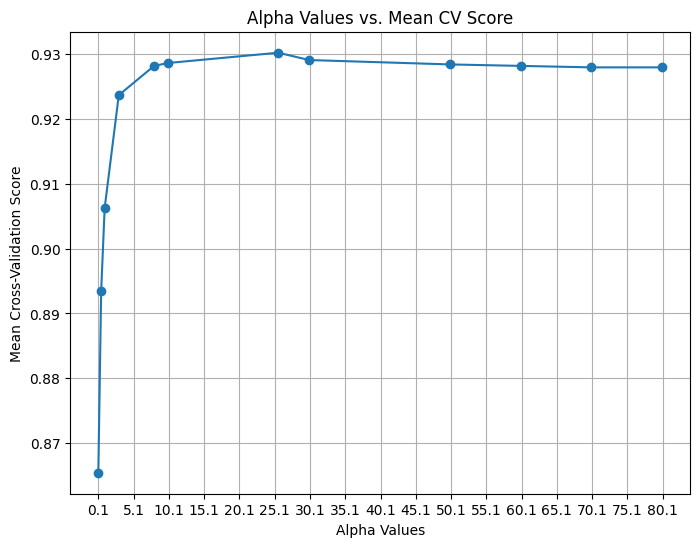

In [ ]:

alpha_values = [0.1, 0.5 ,1.0 ,3.0 ,8.0, 10.0, 25.6, 30, 50 ,60 ,70 ,80 ]  # Add more alpha values to test


alphas = []
mean_cv_scores = []


for alpha in alpha_values:
    nb_model = MultinomialNB(alpha=alpha)
    grid_search = GridSearchCV(nb_model, {'alpha': [alpha]}, cv=5)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_alpha = grid_search.best_params_['alpha']
    mean_cv_score = grid_search.best_score_

    alphas.append(best_alpha)
    mean_cv_scores.append(mean_cv_score)

print(f"Train accuracy{mean_cv_score}")
# Plotting alpha values against mean cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_cv_scores, marker='o')
plt.xlabel('Alpha Values')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Alpha Values vs. Mean CV Score')
plt.xticks(np.arange(min(alpha_values), max(alpha_values)+1, 5.0))  # Adjust x-axis ticks if needed
plt.grid(True)
plt.show()

In [ ]:
precision = precision_score(y_test, y_test_pred, average='weighted')


recall = recall_score(y_test, y_test_pred, average='weighted')


f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9150
Recall: 0.9101
F1 Score: 0.9103


In [ ]:
!pip install --upgrade scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Logistic Regression

In [ ]:
print(X_train_resampled.shape, y_train_resampled.shape)
print(X_test_vect.shape, y_test.shape)

(4428, 4099) (4428,)
(1379, 4099) (1379,)


In [ ]:
#plain implementation

#Salma

LR = LogisticRegression()
LR.fit(X_train_resampled, y_train_resampled)

LR_y_train_pred = LR.predict(X_train_resampled)


LR_y_test_pred = LR.predict(X_test_vect)


accuracy_train = accuracy_score(y_train_resampled, LR_y_train_pred)
print(f'Training Set Accuracy: {accuracy_train:.4f}')


accuracy_test = accuracy_score(y_test, LR_y_test_pred)
print(f'Test Set Accuracy: {accuracy_test:.4f} ')


Training Set Accuracy: 0.9885
Test Set Accuracy: 0.9478 


In [ ]:
# plot_learning_curve(LR, X_train_resampled, y_train_resampled)

In [ ]:
#best parameters 
param_grid = {
    'C': [0.01, 0.1, 10, 100],  # Inverse of regularization strength
    #'penalty': [ 'l2', None],  # Regularization type (L1 or L2)
    'solver': [ 'lbfgs', 'newton-cg', 'sag', 'saga']
}


logistic_regression = LogisticRegression(max_iter = 500)


grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


best_logistic_regression = grid_search.best_estimator_
test_accuracy = best_logistic_regression.score(X_test_vect, y_test)
print("Test Set Accuracy:", test_accuracy)


KeyboardInterrupt: 

In [ ]:
LR_Best =  LogisticRegression(C= 100, solver='saga')

LR_Best.fit(X_train_resampled, y_train_resampled)


# Test set predictions
y_test_pred = LR_Best.predict(X_test_vect)

precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_test_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9468
Recall: 0.9463
F1 Score: 0.9463
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## SVM

In [ ]:
svm_classifier = SVC(kernel='linear', C=0.07)
svm_classifier.fit(X_train_resampled, y_train_resampled)

train_accuracy = svm_classifier.score(X_train_resampled, y_train_resampled)
test_accuracy = svm_classifier.score(X_test_vect, y_test)
print(train_accuracy)
print(test_accuracy)

0.954341987466428
0.9274836838288615


In [ ]:
# cc = [0.07]

# train_accuracies = []
# test_accuracies = []

# svm_classifier = SVC(kernel='linear', C=cc)
# svm_classifier.fit(X_train_resampled, y_train_resampled)
    
# train_accuracy = svm_classifier.score(X_train_resampled, y_train_resampled)
# test_accuracy = svm_classifier.score(X_test_vect, y_test)
    

# plt.figure(figsize=(8, 6))
# plt.plot(0.07, train_accuracies, label='Training Accuracy')
# plt.plot(cc, test_accuracies, label='Testing Accuracy')
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title('SVM Learning Curves for Different C Values')
# plt.legend()
# plt.ylim(0.0, 1.0)  
# plt.show()


TypeError: must be real number, not list

### Determining the best hyperparameters

In [ ]:
param_grid = {
    'C': [0.05,0.07,0.1,0.4, 0.6, 0.8, 1, 3, 5, 7, 9, 12],
    'kernel': ['linear']
}

svm_classifier = SVC()

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid,cv=10, scoring='accuracy')

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)


Best Parameters: {'C': 5, 'kernel': 'linear'}
Best Accuracy: 0.9682266429911417


In [ ]:
param_grid = {
    'C':[1,3,6,9],
    'kernel': ['rbf'],
    'gamma':[0.4, 0.6, 0.8, 1, 3, 5, 7, 9]
}

svm_classifier = SVC()

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)


Best Parameters: {'C': 3, 'gamma': 0.8, 'kernel': 'rbf'}
Best Accuracy: 0.9706724218575236


In [ ]:
param_grid = {
    'C':[1,3,6,9],
    'kernel': ['poly'],
    'degree':[0.4, 0.6, 0.8, 1, 3, 5, 7, 9]
}

svm_classifier = SVC()

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)


### Applying the hyperparameters

In [ ]:
svm_classifier = SVC(kernel='poly', C=3,degree=1)
svm_classifier.fit(X_train_resampled, y_train_resampled)

train_accuracy = svm_classifier.score(X_train_resampled, y_train_resampled)
test_accuracy = svm_classifier.score(X_test_vect, y_test)
print(train_accuracy)
print(test_accuracy)

0.9995487364620939
0.9448875997099347


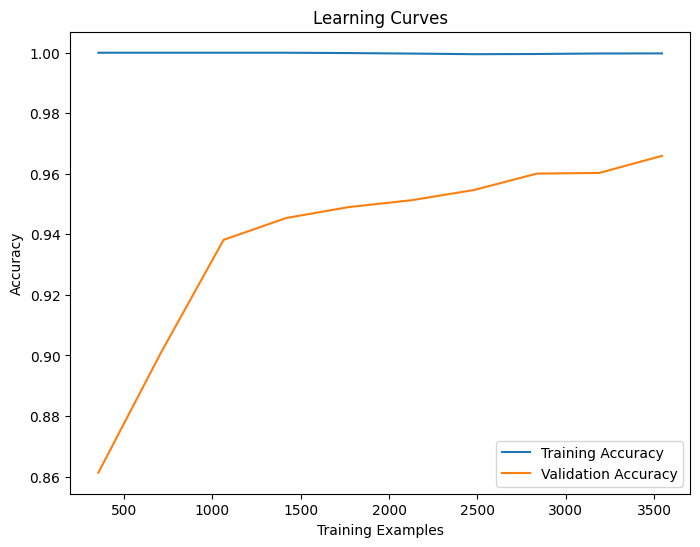

In [ ]:
# Define a function to plot learning curves
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend()
    plt.show()

# Plot learning curves for SVM
plot_learning_curve(svm_classifier, X_train_resampled, y_train_resampled)


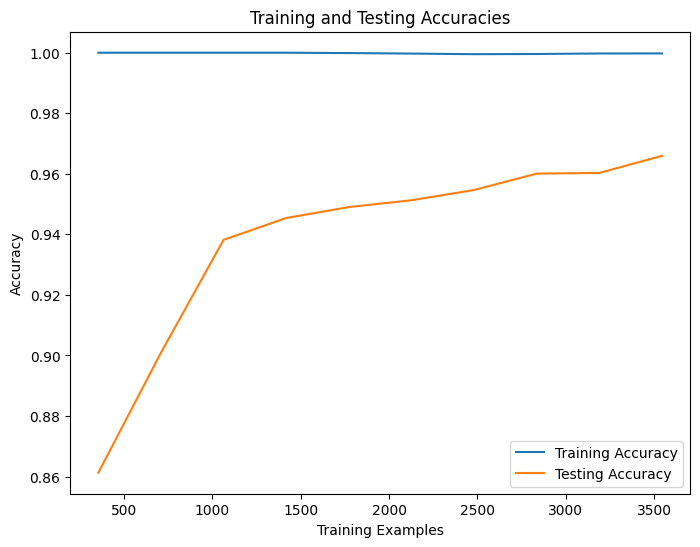

In [ ]:
def plot_training_testing_accuracies(estimator, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=5, scoring='accuracy', 
        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Testing Accuracy')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracies')
    plt.legend()
    plt.show()

plot_training_testing_accuracies(svm_classifier, X_train_resampled, y_train_resampled, X_test_vect, y_test)


## Ensemble Model

In [ ]:
X_train_resampled.shape

(4432, 4103)

In [ ]:
y_train_resampled.shape

(4432,)

In [ ]:
X_test_vect.shape

(1379, 4103)

In [ ]:
y_test.shape

(1379,)

In [ ]:
# from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


model1 = MultinomialNB(alpha=32)  #alpha helping smoothing parameter, to avoid zero probabilities when there is absent features 
model2 = LogisticRegression( C=100, solver='saga') #C is inverse of regularization strength, solver is optimization technique 
model3 = RandomForestClassifier(n_estimators=40, max_depth=4, random_state=42) #n_estimators is the num of trees, max_depth is the max depth of tree
model4 = SVC(kernel='linear', probability=True , C=0.6)  #linear kernel for linear decision boundary, #probability :  enables probability estimates. This is important for the soft voting mechanism in the ensemble.

 
#creating meaning the final prediction is based on the weighted average of the predicted probabilities from each model.
ensemble_model = VotingClassifier(estimators=[('NaiveBayes', model1), ('LogisticRegression', model2), ('RandomForest', model3), ('SVC', model4)], voting='soft')


#voting='soft means that every model gives probability for each class and then output be on the weighted average on these probabilities#
#why 'soft' because all models used in ensemble is probabilstic models 

# Train the ensemble model
ensemble_model.fit(X_train_resampled, y_train_resampled)

y_train_pred1 = ensemble_model.predict(X_train_resampled) 

y_pred = ensemble_model.predict(X_test_vect)

train_accuracy_ensemble = accuracy_score(y_train_resampled, y_train_pred1)

# Evaluate the ensemble model
test_accuracy_ensemble = accuracy_score(y_test, y_pred) 
print(f"Ensemble Model train Accuracy: {train_accuracy_ensemble}\n, Ensemble Model Test Accuracy: {test_accuracy_ensemble}")



/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Ensemble Model train Accuracy: 0.9984205776173285
, Ensemble Model Test Accuracy: 0.9499637418419145


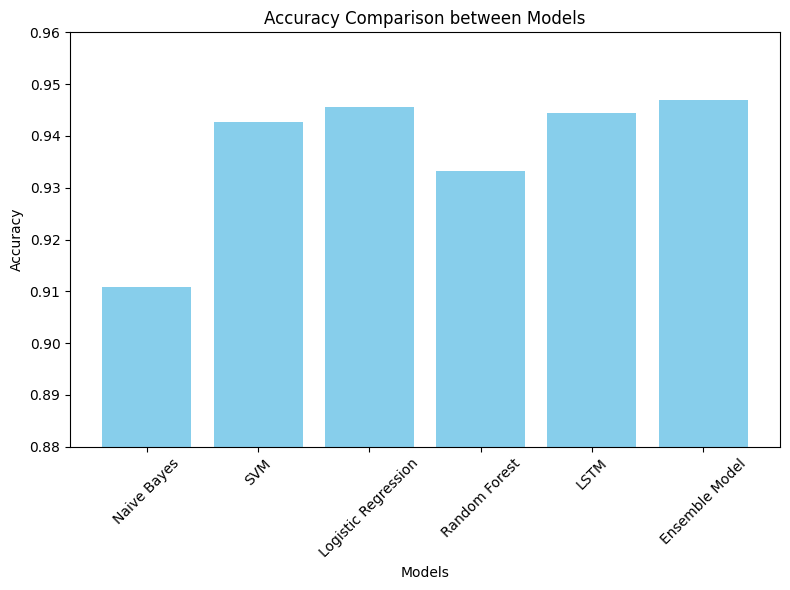

In [ ]:
import matplotlib.pyplot as plt

# List of model names or approaches
model_names = ['Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest', 'LSTM', 'Ensemble Model']

# Accuracy values for each model or approach
accuracy_values = [ 0.9108, 0.9427 , 0.9456 ,0.9332, 0.9445,  0.9470]  # Replace these values with your actual accuracy scores

# Plotting the accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Models')
plt.ylim(0.88, 0.96)  # Set the y-axis limit between 0 and 1 (as accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the training set
y_train_pred = rf_model.predict(X_train_resampled)

# # Evaluate the accuracy on the training set
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Accuracy on the training set: {train_accuracy}")

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test_vect)

# Evaluate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {test_accuracy}")

validation_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Mean validation score: {validation_scores.mean()}") 

Accuracy on the training set: 0.9552205220522052
Accuracy on the test set: 0.9332849891225525
Mean validation score: 0.937448950637927


<function matplotlib.pyplot.show(close=None, block=None)>

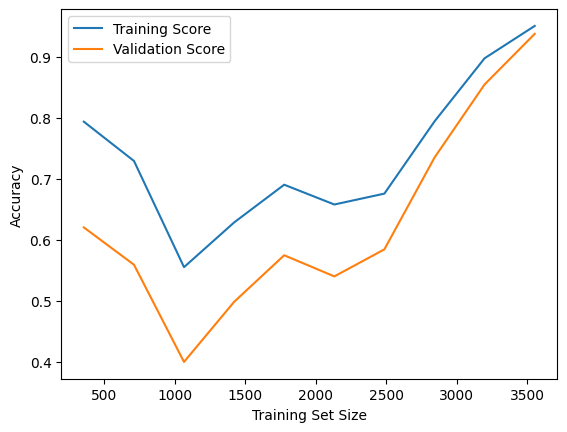

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train_resampled, y_train_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_val_scores = np.mean(val_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, mean_train_scores, label="Training Score")
plt.plot(train_sizes, mean_val_scores, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show

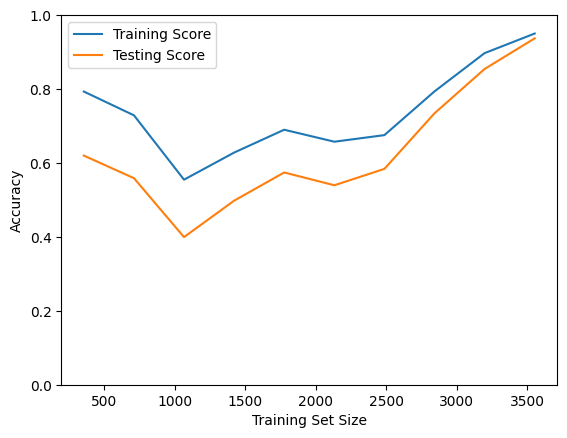

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt



# Generate learning curve data without cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_resampled, y_train_resampled, cv=None, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'  # Adjust scoring metric if needed
)

# Calculate mean scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, mean_train_scores, label="Training Score")
plt.plot(train_sizes, mean_test_scores, label="Testing Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Adjust y-axis range if needed
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assume you have a RandomForestClassifier named 'rf_model'

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)

plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()


In [ ]:
#getting parameters from the previous cell to be able to tune right
model_params = rf_model.get_params()
print(f"Model Parameters:{model_params}")

Model Parameters:{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
     'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200
    
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning and cross-validation
rsCV = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
rsCV.fit(X_train, y_train)

# Get the best hyperparameters
best_params = rsCV.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = rsCV.best_estimator_

#comparing train and test accuracy
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on the Training set: {train_accuracy}\n Accuracy on Test set: {test_accuracy}")



Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}
Accuracy on the Training set: 0.9593951274152899
 Accuracy on Test set: 0.9529675251959686


## KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
# Training set predictions
knn_y_train_pred = knn_classifier.predict(X_train_resampled)

# Calculate accuracy for the training set
accuracy_train = accuracy_score(y_train_resampled, knn_y_train_pred)
print(f'Training Set Accuracy: {accuracy_train:.4f}')

Training Set Accuracy: 0.8330


In [ ]:
#of try 1
# Test set predictions
knn_y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy for the test set
accuracy_test = accuracy_score(y_test, knn_y_test_pred)
print(f'Test Set Accuracy: {accuracy_test:.4f}')

Test Set Accuracy: 0.6642


In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and their corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set with the best parameters
best_knn_classifier = grid_search.best_estimator_
test_accuracy = best_knn_classifier.score(X_test_vect, y_test)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.87479492742992
Test Set Accuracy: 0.7868020304568528


In [ ]:
knn_classifier_tuned = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vect, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_knn_classifier = grid_search.best_estimator_
test_accuracy = best_knn_classifier.score(X_test_vect, y_test)
print("Test Set Accuracy (Tuned):", test_accuracy)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test Set Accuracy (Tuned): 0.8179840464104423


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f31dbb80-cafe-4675-934c-b37fe65f843f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>